In [1]:
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
from data.augmentation import AugmentedFlickrDataset, Flickr30k
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk

In [ ]:
nltk.download('punkt')

In [2]:
dataset = Flickr30k("../flickr30k/flickr30k.exdir")
#augmented_dataset = AugmentedFlickrDataset("../flickr30k/flickr30k.exdir")

Loading Captions:  33%|███▎      | 525/1590 [00:23<00:45, 23.26it/s]

In [ ]:
idx = np.random.randint(0, len(dataset))
x, y = dataset[idx]
print(y)
plt.imshow(x.permute(1,2,0).numpy()/255.0)

In [ ]:
# get some word statistics
def def_val():
    return 0
words = defaultdict(def_val)
for x, y in tqdm(dataset):
    for cap in y:
        tokens = nltk.tokenize.word_tokenize(cap.lower())
        for token in tokens:
            words[token] += 1

In [40]:
word_freqs = [(k, v) for k, v in words.items()]
freqs = [v for v in words.values()]
word_freqs.sort(key=lambda x : x[1], reverse=True)
freqs.sort(reverse=True)
print(freqs[2000])

56


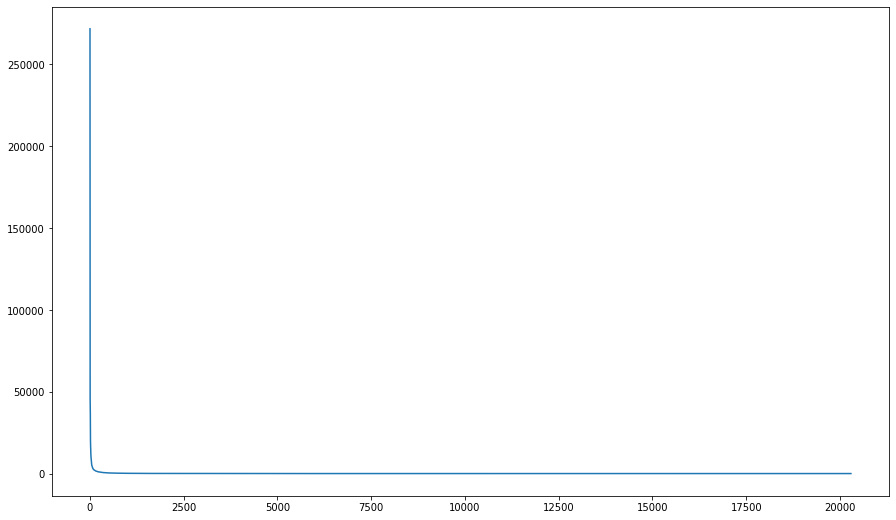

In [41]:
plt.figure(figsize=(15,9))
plt.plot(freqs)

In [32]:
unique_words = len(list(words.keys()))
print(unique_words)
num_words = np.sum(np.asarray(list(words.values())))
print(num_words)
print(list(words.keys())[:40])
print(list(words.values())[:40])


20293
2127888
['two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', '.', ',', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes', 'men', 'green', 'shirts', 'standing', 'a', 'man', 'blue', 'shirt', 'garden', 'friends', 'enjoy', 'time', 'spent', 'together', 'several']
133


In [30]:
num_words = np.sum(np.asarray(list(words.values())[:2000]))
print(num_words)

1996040
